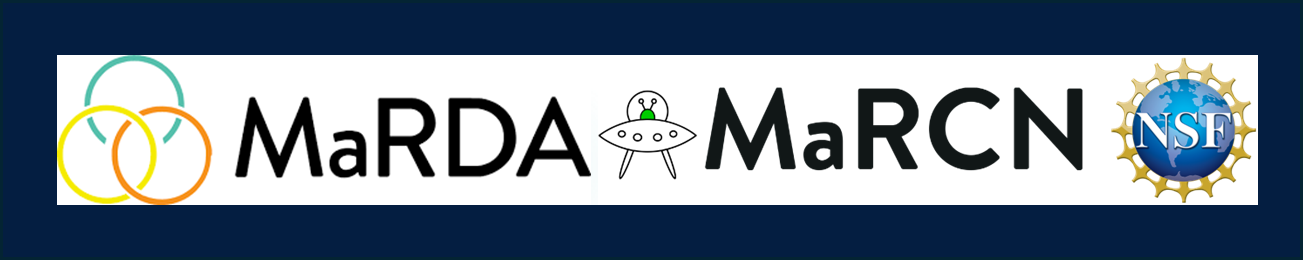

# FAIR Application using Tensile Testing Ontology

Authors: [Erwin Cazares<sup>1</sup>](ecazares3@miners.utep.edu), [Dr Brian E. Schuster<sup>1</sup>](bschuster@utep.edu) </br>

<sup>1</sup> Dynamic Materials Laboratory at University of Texas at El Paso, TX USA 79968</br>

Date of creation: Summer 2024 </br>
Date of last revision: Summer 2024 </br>

# Database Exploration, Analysis and Visualization

This notebook is designed to analyze a series of tensile tests stored in the defined merged database. The analysis results, including various mechanical properties, are extracte and visualized. The notebook outputs several images and a text file containing detailed analysis results.

## Dataset Used
The dataset consists of tensile test report data for stored in a JSON database. This data is used to compute and visualize different mechanical properties of the materials.

## Notebook Structure
The notebook is organized into the following sections:

- **Introduction and Setup:** Provides an overview of the data analysis and specifies the working directories.

- **Data Loading:** Loads the tensile test data from specified directories and prepares the data for analysis.

- **Visualization:**  Generates and saves images that visualize the computed properties and trends.

## Usage

To effectively utilize this notebook, follow these instructions:

- Ensure all required dependencies are installed and configured correctly. Refer to the provided documentation or requirements.txt file for guidance.
- Specify the working directories and ensure the tensile test data is available in the correct format.
- Run the notebook cells sequentially to perform the analysis and generate the results.
- The notebook will output images containing the analysis results, which can be used for further reference and study.

## Define working directories and results path

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# Get the directory of the current script or the parent directory
script_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.path.dirname(os.getcwd())
print(f'Current working directory = {script_dir}')

# Define the database folder containing the JSON files
database_folder = os.path.join(script_dir, 'data', 'database')

# Load JSON data
with open(os.path.join(database_folder, 'processed_data.json'), 'r') as file:
    data = json.load(file)

print(data.keys())

Current working directory = D:\FAIR_Ontology\MaRCN_Tensile_Ontology
dict_keys(['V4_Resin', 'Unknown_Resin', 'Aluminium_6061', 'Brass', 'Steel_1018', 'Steel_4130'])


## Query JSON Database 

Here we present several ways to extract data for a particular propertie or test

### Case #1
***Extract Recorded Young's Modulus and Tensile Strenght for a Defined Material***

We use [jsonpath_ng](https://pypi.org/project/jsonpath-ng/) package for parsing and querying the database

In [2]:
from jsonpath_ng import jsonpath, parse

# Example: Get all Young's Modulus values for all tests of Aluminium 6061
jsonpath_expr = parse('$.Aluminium_6061.*.Secondary_Data.Modulus_of_Elasticity.Values')
e_values_all_tests = [match.value for match in jsonpath_expr.find(data)]
print("Modulus of E. values for all tests of Aluminium 6061:", e_values_all_tests)
print() 

# Example: Get all Tensile Strength values for all tests of Steel 1018
jsonpath_expr = parse('$.Steel_1018.*.Secondary_Data.Tensile_Strength.Values')
strength_values_all_tests = [match.value for match in jsonpath_expr.find(data)]
print("Tensile Strength values for all tests of Steel 1018:", strength_values_all_tests)



Modulus of E. values for all tests of Aluminium 6061: [58.662, 56.164, 65.79, 49.174, 59.64]

Tensile Strength values for all tests of Steel 1018: [307.72384, 413.34729, 274.58578, 310.67449, 315.33091, 281.84123, 226.43373, 342.31817]


### Case #2

***Extract All Calculated Values From a Specific Test***

In [3]:
# Correct JSONPath expression to get all values under Secondary_Data for Aluminium 6061, Tensile Test 1
jsonpath_expr = parse('$.["Aluminium_6061"]["Tensile_test_1"]["Secondary_Data"].*')

# Apply the expression to the data
results = jsonpath_expr.find(data)

# Filter out "Stress" and "Strain" keys
excluded_keys = {"Stress", "Strain"}
filtered_values = {match.path.fields[0]: match.value['Values'] for match in results if match.path.fields[0] not in excluded_keys}

print("Measured Tensile Properties for Aluminium 6061, Tensile Test 1:", filtered_values)

Measured Tensile Properties for Aluminium 6061, Tensile Test 1: {'Modulus_of_Elasticity': 58.662, 'Slope_of_the_Elastic_Part': 158.20588, 'Yield_Strength': 187.8093, 'Tensile_Strength': 247.61473, 'Percentage_Elongation_After_Fracture': 20.04}


## Visualize / Compare Material Systems

### Overview of Calculated Tensile Mechanical Properties of Various Materials

In [4]:
# Excluded keys
excluded_keys = {"Stress", "Strain"}

# Function to extract relevant properties excluding specified keys
def extract_properties(material, data):
    properties = []
    for test_name, test_data in data.items():
        secondary_data = test_data.get("Secondary_Data", {})
        for key, value in secondary_data.items():
            if key not in excluded_keys:
                properties.append({
                    "Material": material,
                    "Test": test_name,
                    "Property": key,
                    "Values": value["Values"],
                    "Units": value["Units"]
                })
    return properties

# Collect all properties
all_properties = []

for material, material_data in data.items():
    all_properties.extend(extract_properties(material, material_data))

# Create a DataFrame
df = pd.DataFrame(all_properties)

# Pivot the DataFrame
pivot_df = df.pivot_table(index=['Material', 'Test'], columns='Property', values='Values', aggfunc=lambda x: ' '.join(map(str, x)))

# Flatten the columns
pivot_df.columns = [f'{col}' for col in pivot_df.columns]

# Reset index for better readability
pivot_df.reset_index(inplace=True)

display(pivot_df)

,Material,Test,Modulus_of_Elasticity,Percentage_Elongation_After_Fracture,Slope_of_the_Elastic_Part,Tensile_Strength,Yield_Strength
0,Aluminium_6061,Tensile_test_1,58.662,20.04,158.20588,247.61473,187.8093
1,Aluminium_6061,Tensile_test_2,56.164,13.858,137.92048,211.67144,160.37525
2,Aluminium_6061,Tensile_test_3,65.79,20.334,203.80741,300.38282,242.53782
3,Aluminium_6061,Tensile_test_4,49.174,18.853,119.00105,194.72546,142.15892
4,Aluminium_6061,Tensile_test_5,59.64,18.823,169.91603,257.32536,198.99661
5,Brass,Tensile_test_1,114.6,25.608999999999998,252.02798,418.83189,352.23066
6,Brass,Tensile_test_2,93.027,31.698999999999998,277.79167,398.45186,340.0554
7,Brass,Tensile_test_3,84.382,31.893,295.45628,419.47427,358.40033
8,Brass,Tensile_test_4,78.35,35.223,239.72939,339.67221,281.53337
9,Brass,Tensile_test_5,67.146,31.828,232.2462,340.01946,280.00837


### Plot All Recorded Tests For a Material

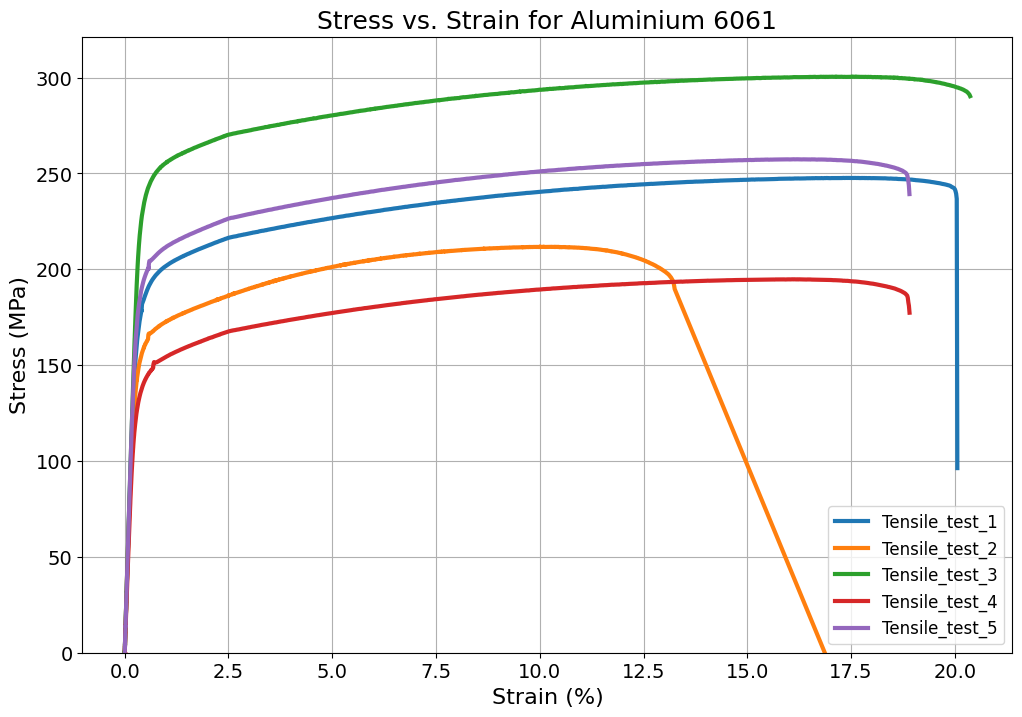

In [5]:
# Function to extract stress and strain data
def extract_stress_strain(material, data):
    stress_strain_data = []
    for test_name, test_data in data.items():
        stress = test_data.get("Secondary_Data", {}).get("Stress", {}).get("Values", [])
        strain = test_data.get("Secondary_Data", {}).get("Strain", {}).get("Values", [])
        if stress and strain:
            stress_strain_data.append({
                "Test": test_name,
                "Stress": stress,
                "Strain": strain
            })
    return stress_strain_data

# Extract stress and strain data for Aluminium 6061
aluminium_6061_data = extract_stress_strain("Aluminium_6061", data["Aluminium_6061"])

# Plot the stress vs. strain for each test
plt.figure(figsize=(12, 8))

for test_data in aluminium_6061_data:
    try:
        plt.plot(test_data["Strain"], test_data["Stress"], label=test_data["Test"], linewidth=3)
    except:
        print(f'{test_data["Test"]} Not supported for plotting')

plt.title('Stress vs. Strain for Aluminium 6061', fontsize = 18)
plt.xlabel('Strain (%)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Stress (MPa)', fontsize = 16)
plt.ylim(bottom=0)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()

### Plot the Test With the Largest Tensile Strength for All Materials

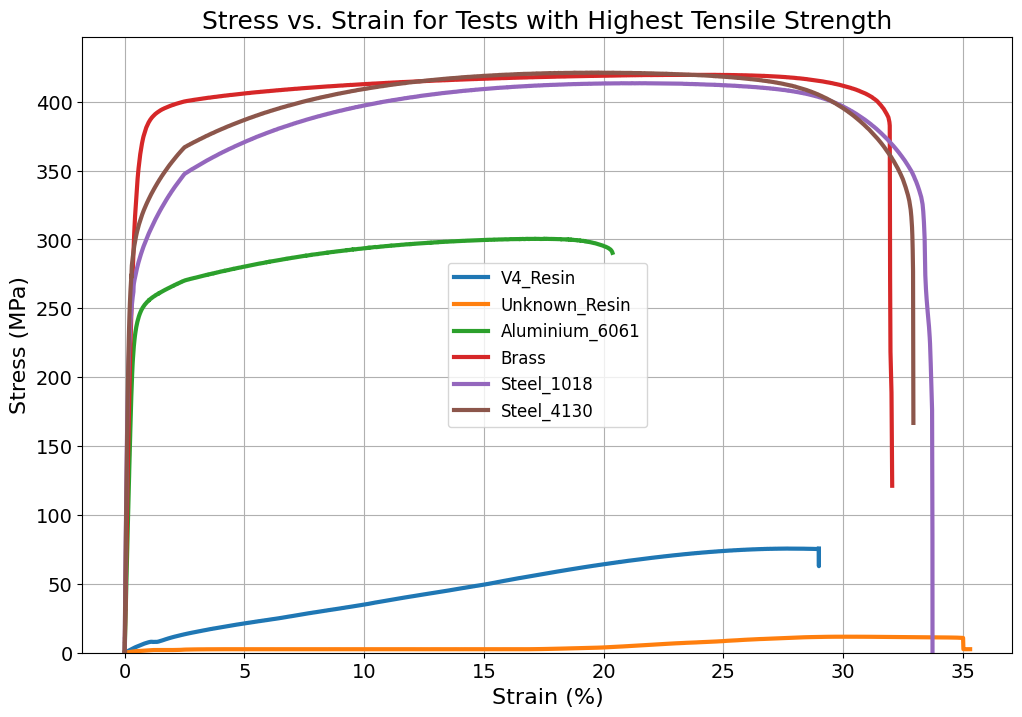

In [6]:
# Function to extract stress, strain, and tensile strength data
def extract_stress_strain(material, data):
    stress_strain_data = []
    for test_name, test_data in data.items():
        stress = test_data.get("Secondary_Data", {}).get("Stress", {}).get("Values", [])
        strain = test_data.get("Secondary_Data", {}).get("Strain", {}).get("Values", [])
        tensile_strength = test_data.get("Secondary_Data", {}).get("Tensile_Strength", {}).get("Values", [0])
        if stress and strain:
            stress_strain_data.append({
                "Test": test_name,
                "Stress": stress,
                "Strain": strain,
                "Tensile_strength": tensile_strength  # Assuming tensile strength is a list, taking the maximum value
            })
    return stress_strain_data

# Function to find the test with the highest tensile strength for each material
def find_highest_tensile_strength_test(material_data):
    highest_tensile_test = None
    highest_tensile_strength = 0
    for test_data in material_data:
        if test_data["Tensile_strength"] > highest_tensile_strength:
            highest_tensile_strength = test_data["Tensile_strength"]
            highest_tensile_test = test_data
    return highest_tensile_test

# Extract stress, strain, and tensile strength data for all materials
materials_data = {}

for material, material_data in data.items():
    materials_data[material] = extract_stress_strain(material, material_data)

# Find the test with the highest tensile strength for each material
highest_tensile_tests = {}

for material, material_tests in materials_data.items():
    highest_tensile_tests[material] = find_highest_tensile_strength_test(material_tests)

# Plot the stress vs. strain for the test with the highest tensile strength for each material
plt.figure(figsize=(12, 8))

for material, test_data in highest_tensile_tests.items():
    if test_data:
        plt.plot(test_data["Strain"], test_data["Stress"], label=f'{material}', linewidth=3)

plt.title('Stress vs. Strain for Tests with Highest Tensile Strength', fontsize = 18)
plt.xlabel('Strain (%)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Stress (MPa)', fontsize = 16)
plt.ylim(bottom=0)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()

### Plot Material With Different Heat Treatments

Tensile_test_1 Not supported for plotting: x and y must have same first dimension, but have shapes (1223500,) and (12235,)
Tensile_test_2 Not supported for plotting: x and y must have same first dimension, but have shapes (1355800,) and (13558,)
Tensile_test_7 Not supported for plotting: x and y must have same first dimension, but have shapes (939500,) and (9395,)


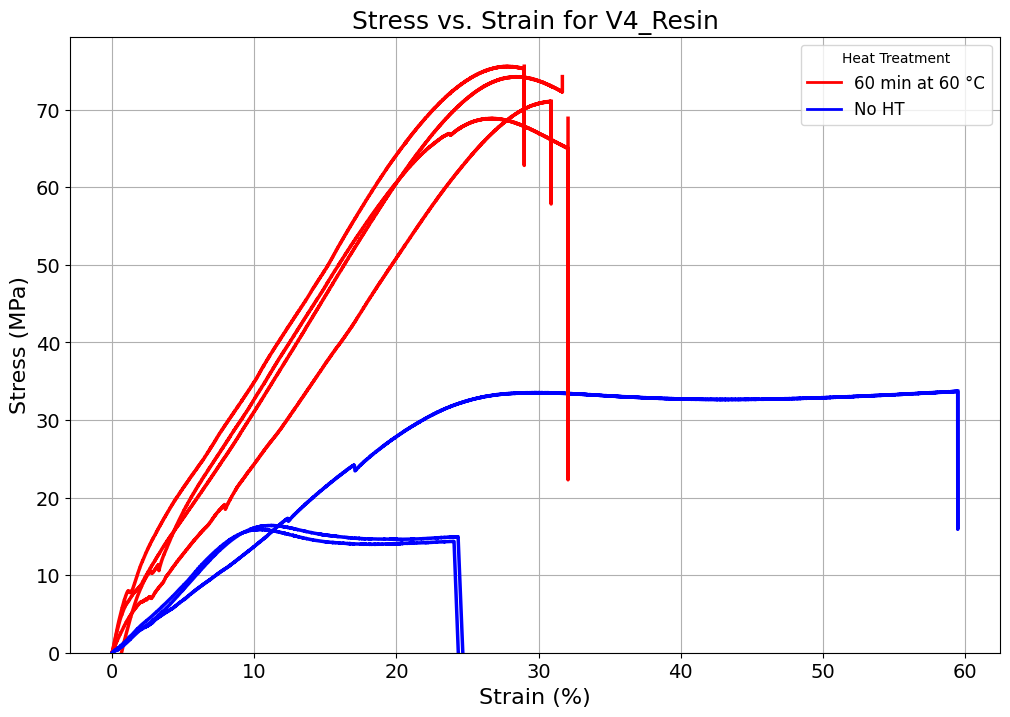

In [7]:
# Function to extract stress and strain data
def extract_stress_strain(material, data):
    stress_strain_data = []
    for test_name, test_data in data.items():
        stress = test_data.get("Secondary_Data", {}).get("Stress", {}).get("Values", [])
        strain = test_data.get("Secondary_Data", {}).get("Strain", {}).get("Values", [])

        # Extract duration value to determine heat treatment
        duration_values = test_data.get("Metadata", {}).get("Sample", {}).get("Heat_Treatment", {}).get("Duration", {}).get("Values", 0)
        
        if isinstance(duration_values, list):
            heat_treatment = any(duration_values)  # Check if any duration value is non-zero
        else:
            heat_treatment = duration_values != 0  # Single value check

        if stress and strain:
            stress_strain_data.append({
                "Test": test_name,
                "Stress": stress,
                "Strain": strain,
                "Heat_T": heat_treatment
            })
    return stress_strain_data

# Extract stress and strain data for V4_Resin
V4_Resin_data = extract_stress_strain("V4_Resin", data["V4_Resin"])

# Plot the stress vs. strain for each test
plt.figure(figsize=(12, 8))

for test_data in V4_Resin_data:
    color = 'red' if test_data["Heat_T"] else 'blue'
    try:
        plt.plot(test_data["Strain"], test_data["Stress"], label=test_data["Test"], color=color, linewidth=2.5)
    except Exception as e:
        print(f'{test_data["Test"]} Not supported for plotting: {e}')

plt.title('Stress vs. Strain for V4_Resin', fontsize = 18)
plt.xlabel('Strain (%)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Stress (MPa)', fontsize = 16)
plt.ylim(bottom=0)
plt.yticks(fontsize = 14)

plt.grid(True)

legend_elements_ht = [Line2D([0], [0], color='red', lw=2, label='60 min at 60 °C'),
                      Line2D([0], [0], color='blue', lw=2, label='No HT')]
# Add the second legend for heat treatment status
plt.legend(handles=legend_elements_ht, title="Heat Treatment", loc='upper right', fontsize = 12)
plt.show()